***HW2 - Detecting Type 1 Diabetes***

# Theory Assignment

**A1**

For our opinion, when it comes to healthcare ML algorithms, Accuracy is more important than performance.
Because we're speaking on human lives, it is better to be more precise than, for example, when estimating house value.

האם התכוונו כאן לביצועיות של המודל? כלומר למהירות בה הוא מגיע לתוצאות?

**A2**

Too many features is often a bad thing. It may lead to Overfitting, meaning that the fitting of your parameters is too tightly to the training data. This results in model discovering random noise in the finite training set instead of the wider relationship between the features and the output variable. Consequently, the model will often perform very well on the training data but perform quite poorly on the test data.
In conclusion, overfitting may be done due to choosing all features, especially whenn taking irrelevant feature like income.

On the other hand, choosing only 2 features for such complex problem may cause under-fitting. meaning that both training accuracy and testing accuracy will be poor.


# Coding Assignment:

Import and load packages:

In [1]:
import pandas as pd 
import numpy as np
from pathlib import Path
import random
import distutils
from Additional_functions import *
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# **Q1 - Data loading and preprocessing:**

In [2]:
def nan2num(dataframe):
    """
    :param dataframe: Pandas series of features
    :return: A pandas dataframe of the dictionary c_cdf containing the "clean" features
    """
    # dataframe = pd.DataFrame(dataframe).drop(extra_feature, 1)
    c_cdf = {}
    c_cdf = dataframe
    for column in dataframe.columns:
        if column == 'Age':
            i=0
        else:
            replacing_value = np.random.choice(dataframe[column])
            c_cdf[column].replace(to_replace= np.nan , value=replacing_value, inplace = True)
    return pd.DataFrame(c_cdf)

def str_to_bool_series(s):
    for index, value in s.items():
        if(value=='Yes'):
            s[index] = True
        elif(value=='No'):
            s[index] = False
        elif(value=='Male'):
            s[index] = True
        elif(value == 'Female'):
            s[index] = False
        elif(value=='Positive'):
            s[index] = True
        elif (value == 'Negative'):
            s[index] = False
#         elif(value==1):
#             s[index] = True
#         elif(value==0):
#             s[index] = False
    return s

In [3]:
df = pd.read_csv('HW2_data.csv')

In [4]:
for column in df.columns:
    str_to_bool_series(df[column])
df.tail()

C:\Users\ofeka\anaconda3\envs\bm-336546\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ofeka\anaconda3\envs\bm-336546\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ofeka\anaconda3\envs\bm-336546\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ofeka\anaconda3\envs\bm-336546\lib\site-packag

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
560,54,True,True,True,True,True,False,NaN,True,True,True,True,True,True,False,False,True,0
561,32,True,False,False,False,False,False,NaN,False,False,True,True,False,False,False,True,True,0
562,61,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,True,1
563,46,True,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,0
564,37,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0


In [5]:
t1d_clean = nan2num(df)

#df.fillna(value = False, inplace = True)
t1d_clean.tail()


,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
560,54,True,True,True,True,True,False,False,True,True,True,True,True,True,False,False,True,0
561,32,True,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,0
562,61,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,True,1
563,46,True,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,0
564,37,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0


# **Q2 -  Split the data into Test Train 20%**

In [6]:
diagnosis = t1d_clean['Diagnosis']


X_train, X_test, y_train, y_test = train_test_split(t1d_clean, np.ravel(diagnosis), test_size=0.2,
                                                        random_state=0, stratify=np.ravel(diagnosis))

# **Q3 - Visualization and exploration of the data**



# Distribution of the features:

In [7]:
def print_dist_features(df, x_train, x_test):
    print("Feature            | Train % | Test % | Difference")
    for column in df:
        if(column=='Age'):
            age_mean_train = round(x_train[column].mean(),2)
            print(column ,end =  " "*(21-len(column))) 
            print(age_mean_train, end = " "*(5))
            age_mean_test = round(X_test[column].mean(),2)
            print(age_mean_test, end = " "*(5))
            difference = round(age_mean_train-age_mean_test,2)
            print(difference, end = " "*(5))
            print()
        elif(column=='Family History'):
            train_count = round(x_train[column].value_counts(ascending = True)/len(x_train[column])*100,2)
            test_count = round(x_test[column].value_counts(ascending = True)/len(x_test[column])*100,2)
            difference = round(train_count[1]-test_count[1],2)
            print(column, end=" "*(21-len(column)))
            print(train_count[1], end = " "*(10-len(str(train_count[1]))))
            print(test_count[1], end = " "*(10-len(str(test_count[1]))))
            print(difference)
        else:
            train_count = round(x_train[column].value_counts(ascending = True)/len(x_train[column])*100,2)
            test_count = round(x_test[column].value_counts(ascending = True)/len(x_test[column])*100,2)
            difference = round(train_count[True]-test_count[True],2)
            print(column, end=" "*(21-len(column)))
            print(train_count[True], end = " "*(10-len(str(train_count[True]))))
            print(test_count[True], end = " "*(10-len(str(test_count[True]))))
            print(difference)

print_dist_features(t1d_clean, X_train, X_test)

Feature            | Train % | Test % | Difference
Age                  48.18     48.12     0.06     
Gender               63.94     62.83     1.11
Increased Urination  48.23     48.67     -0.44
Increased Thirst     44.03     38.05     5.98
Sudden Weight Loss   40.93     46.02     -5.09
Weakness             56.42     60.18     -3.76
Increased Hunger     46.46     43.36     3.1
Genital Thrush       20.58     25.66     -5.08
Visual Blurring      45.8      41.59     4.21
Itching              48.23     44.25     3.98
Irritability         23.01     25.66     -2.65
Delayed Healing      46.9      43.36     3.54
Partial Paresis      42.7      42.48     0.22
Muscle Stiffness     38.27     38.94     -0.67
Hair Loss            34.29     41.59     -7.3
Obesity              17.48     14.16     3.32
Diagnosis            60.62     61.06     -0.44
Family History       50.22     52.21     -1.99


**A3 Section a**

Imbalance between train and test set could cause the learning algorithm to fail in classification of the test set.
Balance can be reached with stratification or normalization. in our case, due to the booleanic nature of the data, its better to do stratification.

# Relationship between feature and label:

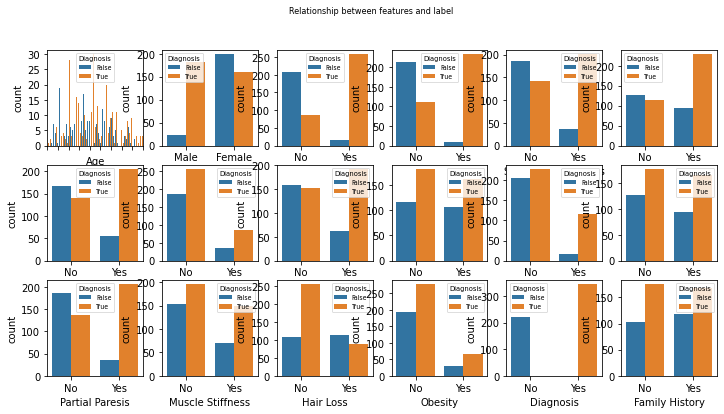

()

In [8]:
import seaborn as sbn
import matplotlib.ticker as ticker

def feature_corr(t1d_df):
    fig, axes = plt.subplots(3, 6,figsize=(12, 6) )
    sbn.set_context("paper", font_scale=0.7)
    fig.suptitle("Relationship between features and label")
    i=0
    for column in t1d_df:
        if(column=='Gender'):
            feat_lab = sbn.countplot(ax = axes[i//6,i%6], x='Gender', hue = 'Diagnosis', data = t1d_df)
            feat_lab.set(xticklabels=['Male', 'Female'])
        elif(column=='Age'):
            feat_lab = sbn.countplot(ax = axes[i//6,i%6], x='Age', hue = 'Diagnosis', data = t1d_df)
            feat_lab.xaxis.set_major_locator(ticker.LinearLocator(10))
        elif(i>1):
            feat_lab = sbn.countplot(ax = axes[i//6,i%6], x=column, hue = 'Diagnosis', data = t1d_df)
            feat_lab.set(xticklabels=['No', 'Yes'])
        i+=1
    plt.show()    
    return()

feature_corr(t1d_clean)
# from functions import feat_lab_cor
# feat_lab_cor(t1d_clean)



Additional plots:

In [9]:
X_train = X_train.drop(columns=['Diagnosis'])
X_test = X_test.drop(columns=['Diagnosis'])

# **Q4 - One Hot Vector**

In [10]:
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
# transform data
onehot = encoder.fit_transform(t1d_clean.drop(columns = ['Age']))
# print(onehot)
print(onehot[1])


[0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.]


Additional plots:

# **Q5 - K cross fold**

In [52]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [19]:
def get_score(model, X_train_gs, X_test_gs, y_train_gs, y_test_gs):
    model.fit(X_train_gs, y_train_gs)
    return model.score(X_test_gs, y_test_gs)

In [59]:
kfold = KFold(n_splits = 5)

#Define algorithms:
model_lr = LogisticRegression()
model_sgd = SGDClassifier()
model_svm = SVC()
model_rf = RandomForestClassifier()



#Define lists for each algorithm
score_lr = []
score_svm = []
score_rf = []
score_sgd = []

X_split = X_train
y_split = y_train
for train_index, test_index in kfold.split(X_train):
    X_train_kf, X_test_kf, y_train_kf, y_test_kf = X_split.iloc[train_index],X_split.iloc[test_index], y_split[train_index],y_split[test_index]
    score_lr.append(get_score(model_lr,X_train_kf,X_test_kf,y_train_kf,y_test_kf))
    score_svm.append(get_score(model_svm,X_train_kf,X_test_kf,y_train_kf,y_test_kf))
    score_rf.append(get_score(model_rf,X_train_kf,X_test_kf,y_train_kf,y_test_kf))
    score_sgd.append(get_score(model_sgd,X_train_kf,X_test_kf,y_train_kf,y_test_kf))
    

C:\Users\ofeka\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ofeka\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

In [65]:
import statistics

print('LR: %.3f' %statistics.mean(score_lr))
print('SGD: %.3f' %statistics.mean(score_sgd))
print('SVM: %.3f' %statistics.mean(score_svm))
print('RF: %.3f' %statistics.mean(score_rf))
print(max(score_lr))
print(max(score_sgd))
print(max(score_svm))
print(max(score_rf))

LR: 0.914
SGD: 0.801
SVM: 0.606
RF: 0.971
0.945054945054945
0.9120879120879121
0.6483516483516484
0.989010989010989
